In [1]:
import numpy as np 
from tensorflow import keras 
from tensorflow.keras import layers

In [25]:
num_classes = 10
input_shape = (28, 28, 1)
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 2s 1us/step


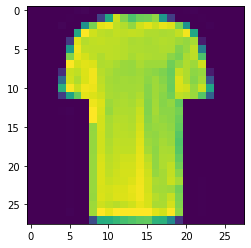

In [31]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
imgplot = plt.imshow(X_train[1800])
plt.show()

In [33]:
print(np.unique(y_train), np.unique(y_test))
print(X_train[0].shape)

[0 1 2 3 4 5 6 7 8 9] [0 1 2 3 4 5 6 7 8 9]
(28, 28)


In [34]:
X_train = X_train.astype("float32") / 255 
X_test = X_test.astype("float32") / 255

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [35]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [41]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=[2, 2]),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax")
    ]
)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 1, 1, 128)       

In [46]:
batch_size = 256
epochs = 15
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [47]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
211/211 [==============================] - 12s 57ms/step - loss: 0.3320 - accuracy: 0.8799 - val_loss: 0.3164 - val_accuracy: 0.8800
Epoch 2/15
211/211 [==============================] - 12s 58ms/step - loss: 0.3230 - accuracy: 0.8838 - val_loss: 0.3045 - val_accuracy: 0.8848
Epoch 3/15
211/211 [==============================] - 12s 57ms/step - loss: 0.3128 - accuracy: 0.8860 - val_loss: 0.2944 - val_accuracy: 0.8908
Epoch 4/15
211/211 [==============================] - 12s 57ms/step - loss: 0.3079 - accuracy: 0.8891 - val_loss: 0.2987 - val_accuracy: 0.8887
Epoch 5/15
211/211 [==============================] - 12s 55ms/step - loss: 0.2991 - accuracy: 0.8912 - val_loss: 0.2944 - val_accuracy: 0.8907
Epoch 6/15
211/211 [==============================] - 12s 57ms/step - loss: 0.2945 - accuracy: 0.8937 - val_loss: 0.2882 - val_accuracy: 0.8923
Epoch 7/15
211/211 [==============================] - 12s 58ms/step - loss: 0.2887 - accuracy: 0.8943 - val_loss: 0.2822 - val_accuracy:

In [48]:
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3055 - accuracy: 0.8913


In [49]:
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")

Test loss: 0.3055430054664612
Test accuracy: 0.8913000226020813


In [55]:
model.predict(X_test)[0]

array([3.0864275e-08, 1.5894826e-10, 3.6022667e-11, 4.6638275e-09,
       2.2951786e-12, 1.7529959e-04, 3.1053243e-11, 2.1922976e-02,
       4.7549449e-08, 9.7790170e-01], dtype=float32)

In [56]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)